In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.contrib.slim as slim
from libs.networks.network_factory import get_network_byname
from libs import build_rpn, build_fast_rcnn, build_fpn
from data.io.read_tfrecord import eval_predict_input_fn
from configs.config import Config
from libs.visualize import display_instances
from libs.label_dict import LABEl_NAME_MAP
from tools.test import model_fn
import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
class PConfig(Config):
    PER_GPU_IMAGE = 1

In [4]:
net_config = PConfig()
session_config = tf.ConfigProto()
session_config.gpu_options.allow_growth = True
session_config.allow_soft_placement = True
estimator_config = tf.estimator.RunConfig(model_dir=net_config.MODLE_DIR,
                                          session_config=session_config)

my_estimator = tf.estimator.Estimator(model_fn,
                                      params={"net_config": net_config}, 
                                      config=estimator_config)
single_record = my_estimator.predict(input_fn=lambda: 
                                     eval_predict_input_fn(net_config.DATA_DIR),
                                     yield_single_examples=True)

INFO:tensorflow:Using config: {'_model_dir': './logs', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  allow_growth: true
}
allow_soft_placement: true
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f152e298860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


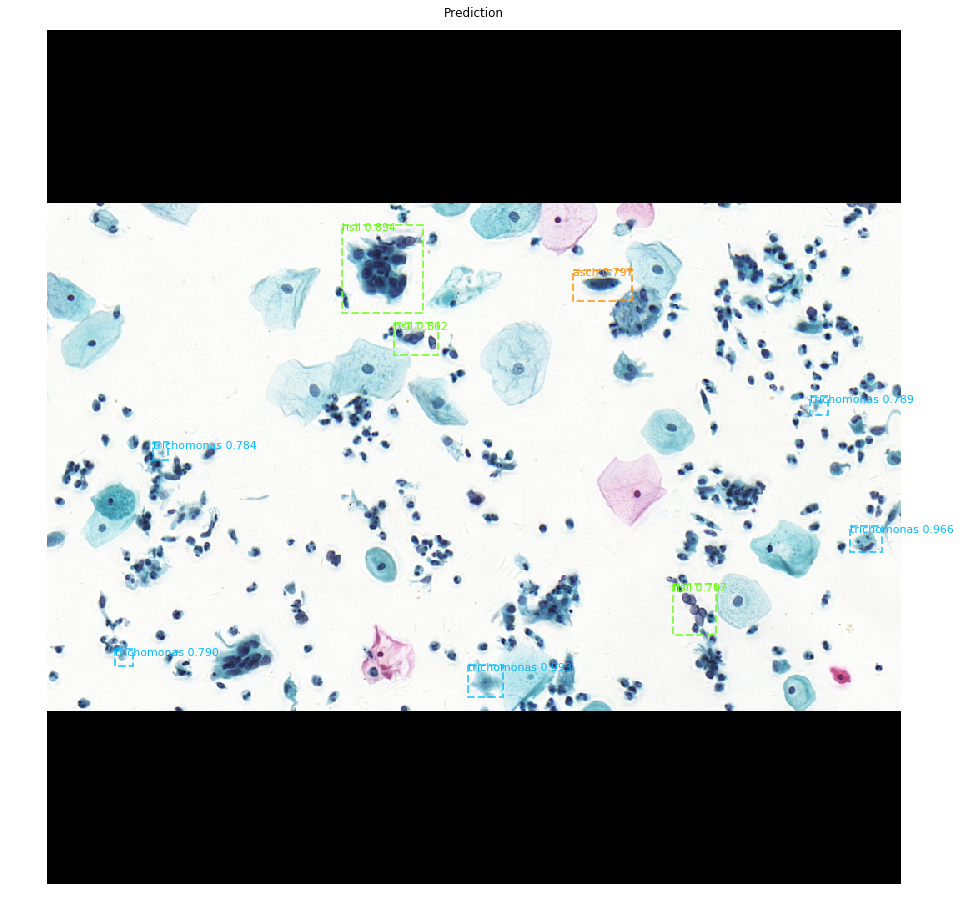

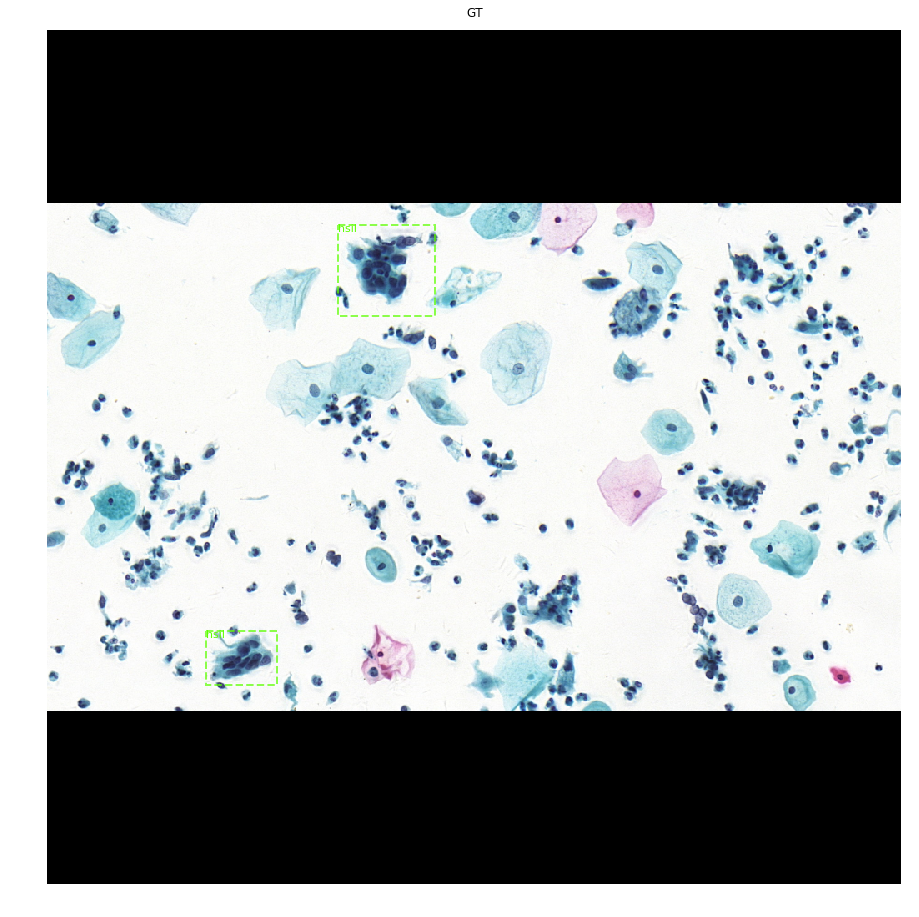

In [23]:
np_single_sample = next(single_record)
display_instances(np_single_sample["image"], np.round(np_single_sample["predict_bbox"]), 
                np_single_sample["predict_class_id"].astype(np.int32), LABEl_NAME_MAP, 
                  scores=np_single_sample["predict_scores"],
                  title="Prediction", random_color=False, num_classes=11)

display_instances(np_single_sample["image"], np.round(np_single_sample["gt_box_labels"][:,:4]), 
                np_single_sample["gt_box_labels"][:,4],class_names=LABEl_NAME_MAP, 
                  title="GT", random_color=False, num_classes=11)
